In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import toeplitz
import time
from scipy.special import sici

In [2]:
def get_acf(tau,f1,f2):
    s1,c1=sici(2*np.pi*f1*tau)
    s2,c2=sici(2*np.pi*f2*tau)
    return c2-c1

In [13]:
f2=0.5
f1=0.1
nn=2*1000

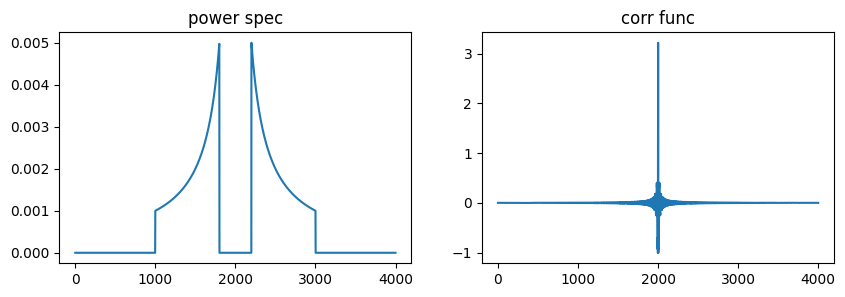

In [14]:
# eigval=np.ones(2*nn)/(2*nn) #white noise ps. defaults to sigma^2 = 1
eigval=np.zeros(2*nn,dtype='complex128')
eigval[int(f1*nn):int(f2*nn)+1]=1/np.arange(int(f1*nn),int(f2*nn)+1)
eigval[-int(f2*nn)-1:-int(f1*nn)]=1/np.arange(int(f2*nn)+1,int(f1*nn),-1)
# eigval[0]=0
f=plt.gcf()
f.set_size_inches(10,3)
plt.subplot(121)
plt.title("power spec")
plt.plot(np.fft.fftshift(eigval))
plt.subplot(122)
plt.title("corr func")
acf=np.fft.fft(eigval).real #doing fft instead of ifft so I dont have to multiply by N
plt.plot(np.fft.fftshift(acf))

In [15]:
acf[nn]

1.299884500679182e-05

In [19]:
x=np.random.randn(2*nn)
y=np.sqrt(2)*np.fft.fft(np.sqrt(eigval)*x)[:nn].copy()

In [20]:
yr=y.real
yi=y.imag

In [21]:
yn=len(y)
print("len y is", yn)

len y is 20000


In [ ]:
# acf=get_acf_analytical(bw,len(y)+1,nn,snr)[1:]
C=toeplitz(acf[:yn+1])
Cinv=np.linalg.inv(C)
# Cinv=np.linalg.pinv(S2,hermitian=True,rcond=1e-8)
Cinv@C

In [ ]:
plt.plot(acf[:nn])

In [ ]:
acf_analytical=get_acf(np.arange(0,nn),f1,f2)

In [6]:
# acf=get_acf_analytical(bw,len(y)+1,nn,snr)[1:]
Cs=toeplitz(acf[:yn])
Cinvs=np.linalg.inv(Cs) #one element smaller
# Cinv=np.linalg.pinv(S2,hermitian=True,rcond=1e-8)

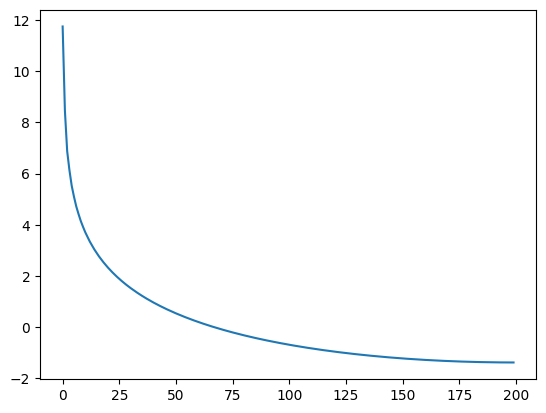

In [17]:
plt.plot(acf[:yn])

In [18]:
coeffs=-Cinv[-1,:-1]/Cinv[-1,-1]
coeffs=coeffs.real
sigma=1/np.sqrt(Cinv[-1,-1])

In [25]:
ks=np.arange(1,nn)
ks

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
def get_corr_vec2(eigval,N,taus):
    # from kriging IQ upsamp
    ks=np.arange(N)
    print(len(ks))
    return 2*eigval[:N]@np.cos(2*np.pi*np.outer(ks,taus)/(2*N)) - eigval[0] + eigval[N]*np.cos(np.pi*taus)

In [8]:
taus=np.linspace(0,10*nn,10*nn+1)/10
len(taus)

2001

In [11]:
corr_fine=get_corr_vec2(eigval,nn,taus)
corr_coarse=get_corr_vec2(eigval,nn,np.linspace(1,nn,nn))

200
200


(0.0, 10.0)

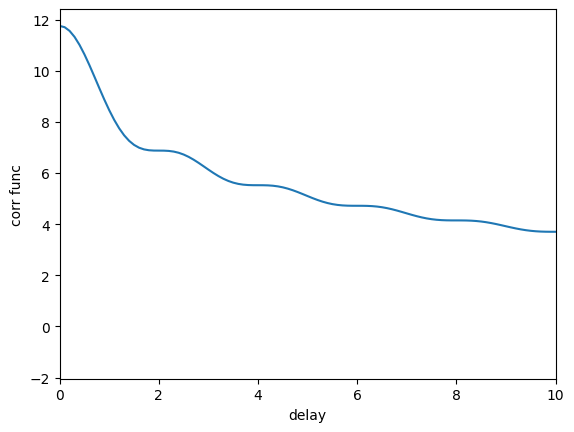

In [20]:
plt.plot(taus,corr_fine)
# plt.plot(corr_coarse)
# plt.plot(np.linspace(nn,1,nn),corr_coarse)
plt.xlabel("delay")
plt.ylabel("corr func")
plt.xlim(0,10)


In [14]:
corr_coarse[:5], acf[1:6]

(array([8.45453551, 6.87583736, 6.13138002, 5.52267779, 5.09673979]),
 array([8.45453551, 6.87583736, 6.13138002, 5.52267779, 5.09673979]))

In [51]:
eigval[-200]

0.005

In [55]:
bw=len(eigval)//2
eigval_big=np.zeros(len(eigval)*10,dtype=eigval.dtype)
eigval_big[:bw+1]=eigval[:bw+1]
eigval_big[-bw:]=eigval[-bw:]
acf_big=np.fft.fft(eigval_big)

(0.0, 100.0)

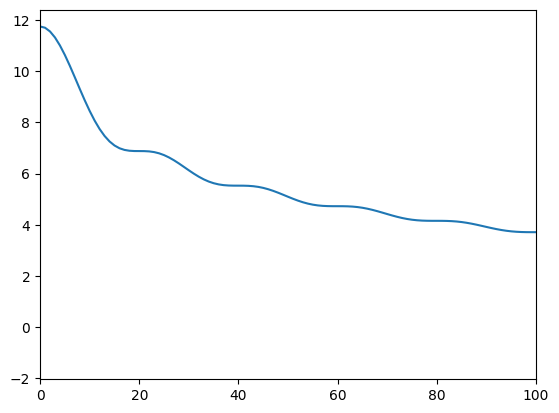

In [59]:
plt.plot(acf_big.real)
plt.xlim(0,100)

(0.0, 10.0)

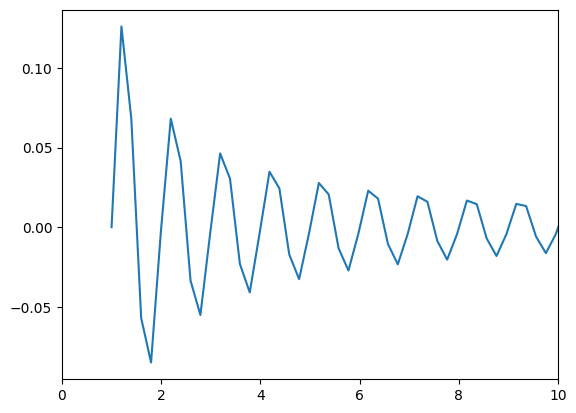

In [69]:
plt.plot(taus,np.sinc(2*taus))
plt.xlim(0,10)

In [59]:
taus[5]

199.005

In [92]:
B2=get_corr_vec(eigval,ks,np.linspace(nn,1,nn))

In [62]:
B=C[-1,:-1]
# B=B[::-1]
np.max(np.abs(B.T@Cinvs-coeffs))

8.848755062018654e-13

In [94]:
np.max(np.abs(B2.T@Cinvs-coeffs))

3.3498048085389698e-12

In [113]:
sigma2 = np.sqrt(C[0,0]-B.T@Cinvs@B)
assert(np.allclose(sigma2,sigma))

In [137]:
osamp=10
coeffs_arr=np.zeros((osamp,nn), dtype='float64') #for sub-sample point 1 to osamp where final point is essentially the next "big" point
sigma_arr=np.zeros(osamp,dtype='float64')
for oo in range(1,osamp+1): #start from n + delta and go till n+1'th point
    vec=get_corr_vec(eigval,ks,np.linspace(nn-1,0,nn)+oo/osamp) #this is the corr array. use past n pts to predict next pt
    coeffs_arr[oo-1,:]=vec
    sigma_arr[oo-1] = np.sqrt(C[0,0]-vec.T@Cinvs@vec)
coeffs_arr = coeffs_arr@Cinvs #coeffs = corr dot Cinv_small

/tmp/ipykernel_159682/1755557458.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  coeffs_arr[oo-1,:]=vec
/tmp/ipykernel_159682/1755557458.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma_arr[oo-1] = np.sqrt(C[0,0]-vec.T@Cinvs@vec)


In [134]:
np.max(np.abs(coeffs_arr[-1,:]-coeffs))

3.3451002384721207e-12

In [60]:
sigma_arr

NameError: name 'sigma_arr' is not defined

In [135]:
coeffs_arr@y

array([2.5476448 -0.1680157j , 2.61935643-0.1512556j ,
       2.68281153-0.13445497j, 2.73776794-0.11764127j,
       2.78401188-0.10084182j, 2.82135861-0.08408377j,
       2.84965317-0.06739406j, 2.86877087-0.05079936j,
       2.87861773-0.03432608j, 2.87913089-0.01800029j])

In [146]:
coeffs@y #last element

(2.8791308929211654-0.018000292147381566j)

In [150]:
sigma

0.08357945699465831

In [151]:
sigma_arr

array([0.04508485, 0.04748754, 0.05032712, 0.05362429, 0.05739405,
       0.0616466 , 0.06638839, 0.07162325, 0.07735326, 0.08357946])

In [209]:
extra=nn
y_long = np.hstack([y,np.zeros(extra,dtype=y.dtype)])
niter=1000
t1=time.time()
for i in range(niter):
    y_osamp = np.zeros(extra*osamp+1,dtype=y.dtype) #even idx to end at. 
    # y_osamp_smooth = np.zeros(extra*osamp+1,dtype=y.dtype) #even idx to end at. 
    for ii in range(extra):
        jj = len(y) + ii
        # print("using big points",jj-nn, "to", jj-1)
        # print("filling small pts",ii*osamp+1,'to',(ii+1)*osamp)
        # print(coeffs_arr@y_long[jj-nn:jj])
        # y_osamp_smooth[ii*osamp+1:(ii+1)*osamp+1]=coeffs_arr@y_long[jj-nn:jj] 
        # y_osamp[ii*osamp+1:(ii+1)*osamp+1] = y_osamp_smooth[ii*osamp+1:(ii+1)*osamp+1] + sigma_arr*(np.random.randn(osamp)+1j*np.random.randn(osamp))
        y_osamp[ii*osamp+1:(ii+1)*osamp+1] = coeffs_arr@y_long[jj-nn:jj] + sigma_arr*(np.random.randn(osamp)+1j*np.random.randn(osamp))
        y_long[jj]=y_osamp[(ii+1)*osamp]
        # print(y_long[jj])
t2=time.time()
print("avg time per loop", (t2-t1)/niter)

avg time per loop 0.0010530760288238526


In [207]:
niter=1000
t1=time.time()
for i in range(niter):
    bigger_ft = np.zeros(len(y_long)*osamp,dtype='complex128')
    y_long_ft = np.fft.fft(y_long)
    bigger_ft[:nn+1]=y_long_ft[:nn+1] #nyquist included as positive
    bigger_ft[-nn:]=y_long_ft[-nn:]
    y_osamp2=np.fft.ifft(bigger_ft)*osamp
t2=time.time()
print("avg time per loop", (t2-t1)/niter)

avg time per loop 3.1293630599975585e-05


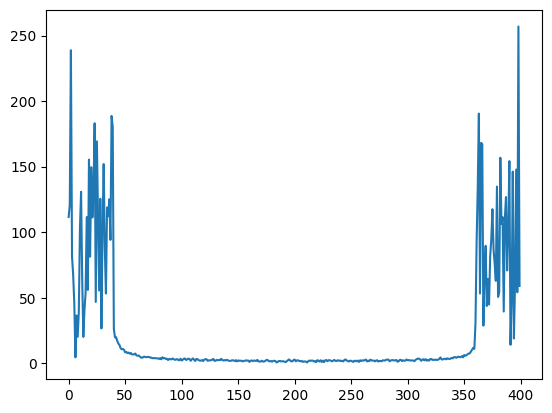

In [169]:
plt.plot(np.abs(y_long_ft))

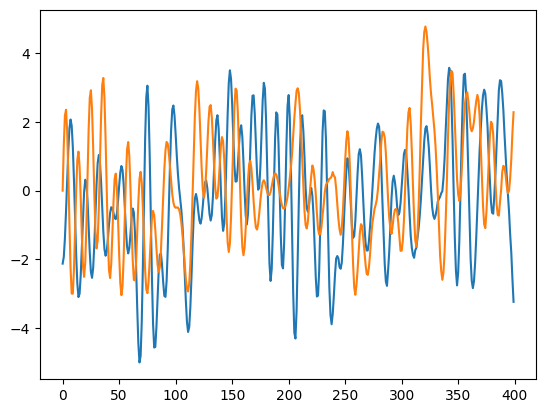

In [154]:
plt.plot(y_long.real)
plt.plot(y_long.imag)

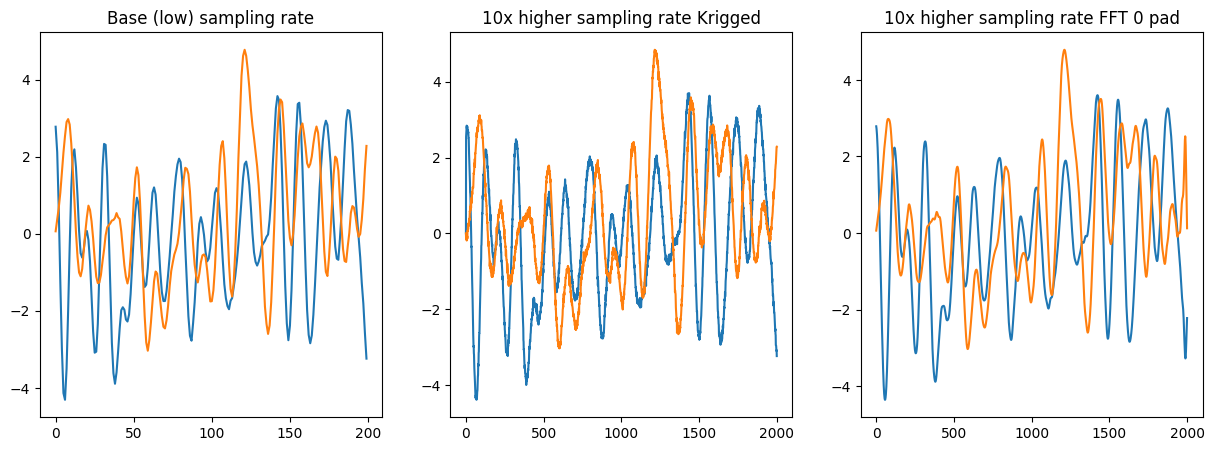

In [180]:
f=plt.gcf()
f.set_size_inches(15,5)
plt.subplot(131)
plt.title("Base (low) sampling rate")
plt.plot(y_long.real[200:])
plt.plot(y_long.imag[200:])
plt.subplot(132)
plt.title("10x higher sampling rate Krigged")
plt.plot(y_osamp.real)
plt.plot(y_osamp.imag)
plt.subplot(133)
plt.title("10x higher sampling rate FFT 0 pad")
plt.plot(y_osamp2[2000:].real)
plt.plot(y_osamp2[2000:].imag)

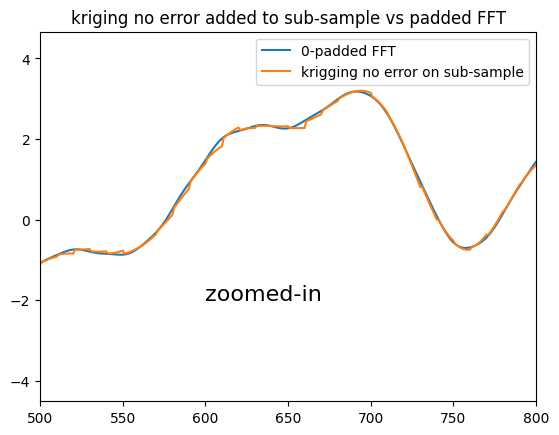

In [201]:
plt.plot(y_osamp2[2000:],label="0-padded FFT")
plt.plot(y_osamp_smooth[10:],label="krigging no error on sub-sample")
plt.title("kriging no error added to sub-sample vs padded FFT")
plt.text(600,-2,"zoomed-in",fontsize=16)
plt.xlim(500,500+300)
plt.legend()

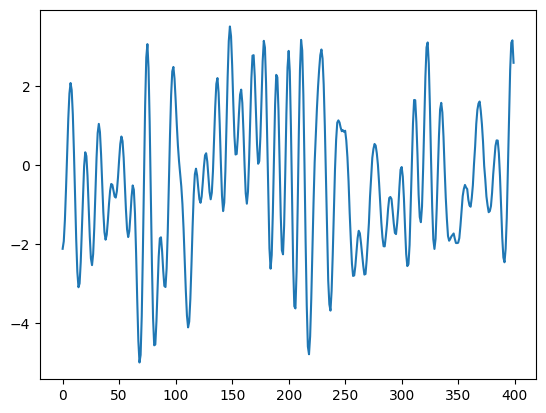

In [153]:
plt.plot(y_long_filled.real[:400]) #old simulation for shape comaprison

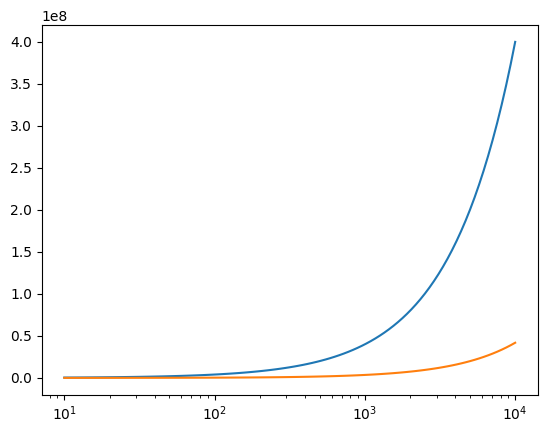

In [69]:
ps=(10**np.linspace(1,4,101)).astype(int)
plt.semilogx(ps,ps*nn**2)
plt.semilogx(ps,ps*nn*np.log2(ps*nn))
